# Reconhecimento Facial com métodos Deep Learning

## Importação das Bibliotecas

In [27]:
import dlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import zipfile
import os

## Detecção de Pontos Faciais (landmarks)

In [61]:
def detector_facial(image):
  detector_face = dlib.get_frontal_face_detector()
  detector_pontos = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
  detector_face2 = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')
  imagem = cv2.imread(image)

  detector_facial = detector_face(imagem, 1)
  for face in detector_facial:
    (l,t,r,b) = face.left(), face.top(), face.right(), face.bottom()
    pontos = detector_pontos(imagem, face)
    for i, ponto in enumerate(pontos.parts()):
      (ponto_x, ponto_y) = ponto.x, ponto.y
      cv2.circle(imagem, (ponto_x, ponto_y), 1, (0,255,0), 2)
      cv2.putText(imagem, str(i), (ponto_x+10, ponto_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
    cv2.rectangle(imagem, (l,t),(r,b), (0,255,0), 1)

  cv2_imshow(imagem)

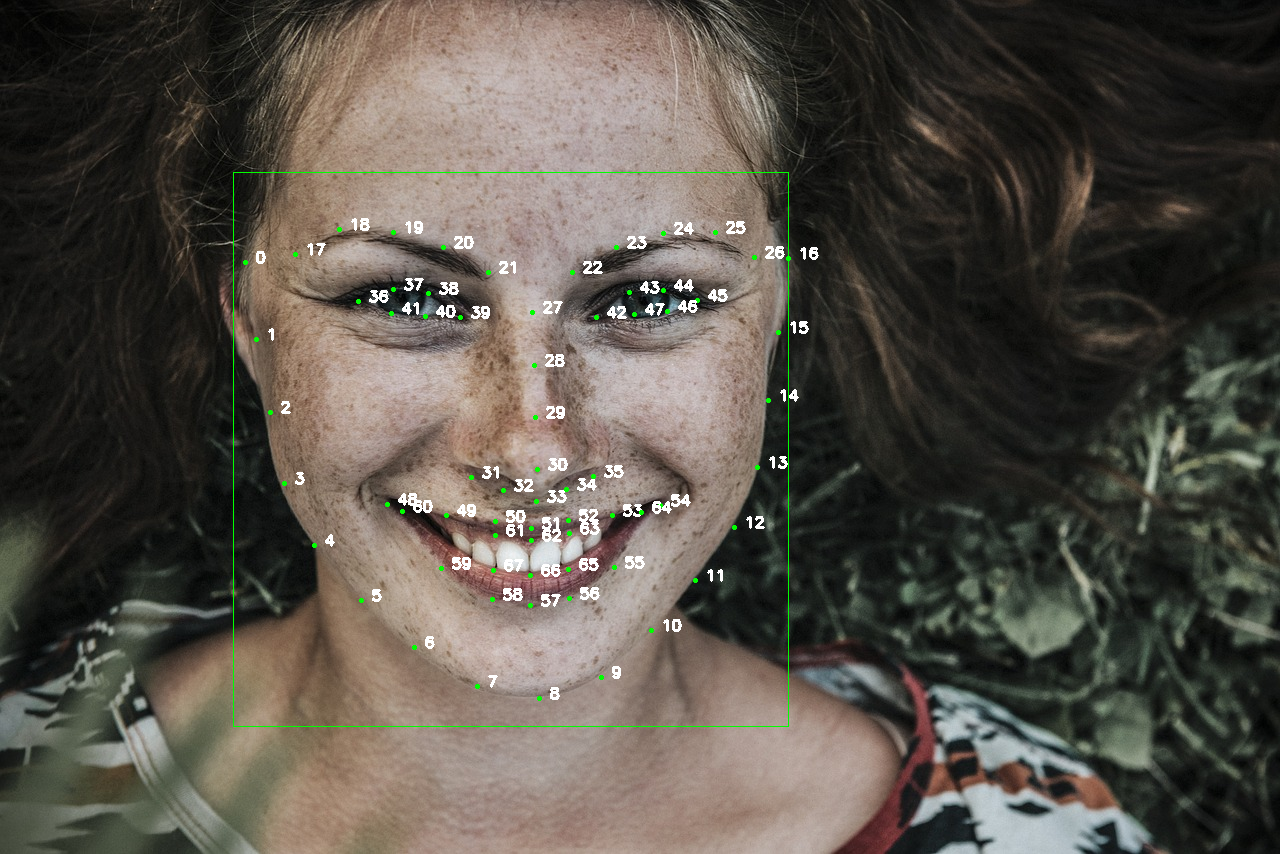

In [62]:
imagem = '/content/px-woman-smilings.jpg'
detector_facial(imagem)

## Carregamento da Base de Dados

In [250]:
path = '/content/yalefaces.zip'

with zipfile.ZipFile(file=path, mode='r') as f:
    f.extractall('./')

## Detecção de descritores Faciais

In [265]:
detector_facial = dlib.get_frontal_face_detector()
detector_pontos_faciais = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
extrator_descritor_facial = dlib.face_recognition_model_v1('/content/dlib_face_recognition_resnet_model_v1.dat')

In [266]:
def extrai_descritor(arquivo):

  imagem = Image.open(arquivo).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  imagem_np = cv2.cvtColor(imagem_np, cv2.COLOR_GRAY2RGB)

  descricoes_faciais = None

  detector = detector_facial(imagem_np, 1)
  for face in detector:
    (l,t,r,b) = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem_np, (l,t),(r,b),(0,255,0), 2)

    pontos = detector_pontos_faciais(imagem_np, face)
    descritor_facial = extrator_descritor_facial.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial)
    descritor_facial = descritor_facial[np.newaxis, :]

    if descricoes_faciais is None:
      descricoes_faciais = descritor_facial
    else:
      descricoes_faciais = np.concatenate((descricoes_faciais, descritor_facial), axis=0)

  return np.array(imagem_np), descricoes_faciais

In [267]:
pasta_teste = '/content/yalefaces/train/subject01.glasses.gif'
imagem_np, descritor_facial = extrai_descritor(pasta_teste)

In [268]:
def carrega_treinamento(diretorio):
  paths = [os.path.join(diretorio, f) for f in os.listdir(diretorio)]

  descritores_faciais = None
  ids = []
  index = {}
  idx = 0
  imagens = []
  for path in paths:
    imagem_np, descritor_facial = extrai_descritor(path)
    imagens.append(imagem_np)
    id = int(os.path.basename(path).split('.')[0][-2:])
    index[idx] = os.path.basename(path)
    idx += 1
    ids.append(id)
    if descritores_faciais is None:
      descritores_faciais = descritor_facial
    else:
      if descritor_facial is not None:
        descritores_faciais = np.concatenate((descritores_faciais, descritor_facial), axis=0)

  return descritores_faciais, np.array(ids), index, np.array(imagens)

In [269]:
diretorio = '/content/yalefaces/train'
descritores_faciais, ids, index, imagens = carrega_treinamento(diretorio)

In [270]:
descritores_faciais.shape

(132, 128)

In [271]:
ids

array([15,  9, 12,  4,  8,  2, 15,  7,  4, 10,  1, 14,  7,  7, 13,  8,  6,
       15,  3,  5,  6,  4, 14,  4,  1,  8, 15,  2, 10,  6, 14, 11,  6, 11,
        3, 12,  5, 10, 13, 12,  1,  3,  2, 10,  9,  2, 15, 12, 11,  9, 12,
       13, 14, 13,  2,  1,  9,  3,  7, 14,  3,  1,  2,  6,  1, 12,  8,  7,
       11, 14,  4, 10,  7, 13,  7,  5, 13,  6,  1,  9,  6,  9, 14,  5, 15,
       15, 10,  5,  8, 13, 10,  2, 10, 11,  9,  3,  7,  4,  4, 12,  5, 10,
        3,  4,  1, 13, 13, 12,  2,  3, 14,  8,  7,  5,  9,  8, 15, 11, 14,
       11,  9,  4,  6,  3,  1,  5,  6,  8, 12, 11,  8, 15, 11,  2,  5])

In [272]:
index

{0: 'subject15.sleepy.gif',
 1: 'subject09.glasses.gif',
 2: 'subject12.wink.gif',
 3: 'subject04.noglasses.gif',
 4: 'subject08.glasses.gif',
 5: 'subject02.normal.gif',
 6: 'subject15.noglasses.gif',
 7: 'subject07.surprised.gif',
 8: 'subject04.sleepy.gif',
 9: 'subject10.normal.gif',
 10: 'subject01.surprised.gif',
 11: 'subject14.wink.gif',
 12: 'subject07.sleepy.gif',
 13: 'subject07.glasses.gif',
 14: 'subject13.leftlight.gif',
 15: 'subject08.surprised.gif',
 16: 'subject06.centerlight.gif',
 17: 'subject15.leftlight.gif',
 18: 'subject03.noglasses.gif',
 19: 'subject05.leftlight.gif',
 20: 'subject06.noglasses.gif',
 21: 'subject04.glasses.gif',
 22: 'subject14.sleepy.gif',
 23: 'subject04.normal.gif',
 24: 'subject01.sleepy.gif',
 25: 'subject08.centerlight.gif',
 26: 'subject15.surprised.gif',
 27: 'subject02.surprised.gif',
 28: 'subject10.noglasses.gif',
 29: 'subject06.rightlight.gif',
 30: 'subject14.noglasses.gif',
 31: 'subject11.sad.gif',
 32: 'subject06.surprised.gif

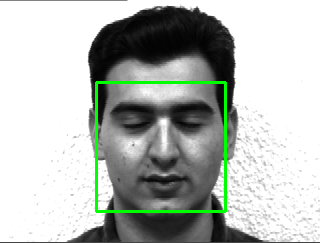

In [273]:
cv2_imshow(imagens[0])

## Salvando Descritores

In [274]:
import pickle

np.save('descritores_faces.npy', descritores_faciais)
with open('ids_faces.pickle', 'wb') as f:
    pickle.dump(index, f)

## Carregando Descritores

In [275]:
index = np.load('/content/ids_faces.pickle', allow_pickle=True)
descritores_faces = np.load('/content/descritores_faces.npy')

## Cálculo da distância entre as faces

In [276]:
np.argmin(np.linalg.norm(descritores_faces[0] - descritores_faces[1:], axis=1))

5

In [277]:
np.linalg.norm(descritores_faces[0] - descritores_faces[1:], axis=1)[5]

0.23620039543228538

## Previsão Base de Teste

In [315]:
def previsoes_dlib(path_dataset, descritores_faciais, index, threshold=0.5):

  paths = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]
  previsoes = []
  saidas_esperadas = []
  imagens = []
  for path in paths:
    imagem = Image.open(path).convert('RGB')
    imagem_np = np.array(imagem, 'uint8')
    (h,w) = imagem_np.shape[:2]
    deteccoes = detector_facial(imagem_np, 1)
    for face in deteccoes:
      pontos = detector_pontos_faciais(imagem_np, face)
      descritor_facial = extrator_descritor_facial.compute_face_descriptor(imagem_np, pontos)
      descritor_facial = [f for f in descritor_facial]
      descritor_facial = np.asarray(descritor_facial)
      descritor_facial = descritor_facial[np.newaxis, :]

      distancias = np.linalg.norm((descritor_facial - descritores_faciais), axis=1)
      min_index = np.argmin(distancias)
      distancia_min = distancias[min_index]

      if distancia_min <= threshold:
        nome_previsao = int(os.path.basename(index[min_index]).split('.')[0][-2:])
      else:
        nome_previsao = -1
      nome_real = int(os.path.basename(path).split('.')[0][-2:])

      previsoes.append(nome_previsao)
      saidas_esperadas.append(nome_real)

      cv2.putText(imagem_np, "Previsao: "+ str(nome_previsao), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
      cv2.putText(imagem_np, "Real: "+ str(nome_real), (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
      cv2.putText(imagem_np, str(distancia_min), (10,h - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,244,0))

      imagens.append(imagem_np)

  return np.array(previsoes), np.array(saidas_esperadas), np.array(imagens)

In [316]:
previsoes, saidas_esperadas, imagens = previsoes_dlib('/content/yalefaces/test', descritores_faciais, index, threshold=0.5)

In [317]:
previsoes

array([10,  6,  4,  7,  7, 13,  9,  2, 11, 12,  7, 15,  1, 14,  9, 10, 10,
        8,  8, 13,  6,  8,  6,  9, 14, 15,  2,  4, 13,  4])

In [318]:
saidas_esperadas

array([10,  6,  4,  5,  7, 13,  3,  2, 11, 12,  5, 15,  1, 14,  9,  3, 10,
        8,  8, 13,  6,  7, 11,  9, 14, 15,  2,  4, 12,  1])

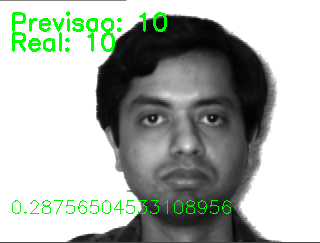

In [319]:
cv2_imshow(imagens[0])

## Avaliação do Algoritmo

In [320]:
from sklearn.metrics import accuracy_score

accuracy_score(previsoes, saidas_esperadas)

0.7333333333333333